<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

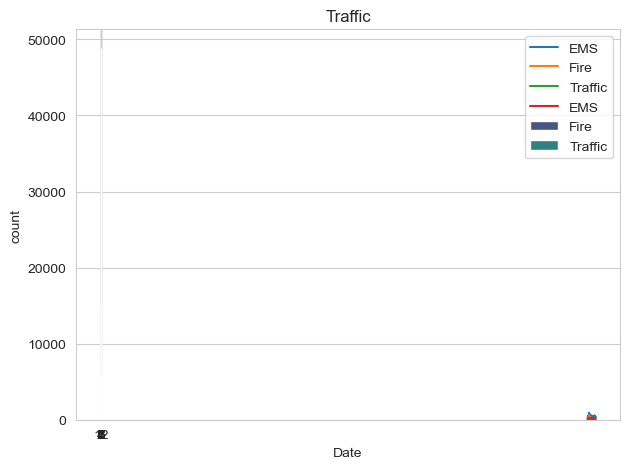

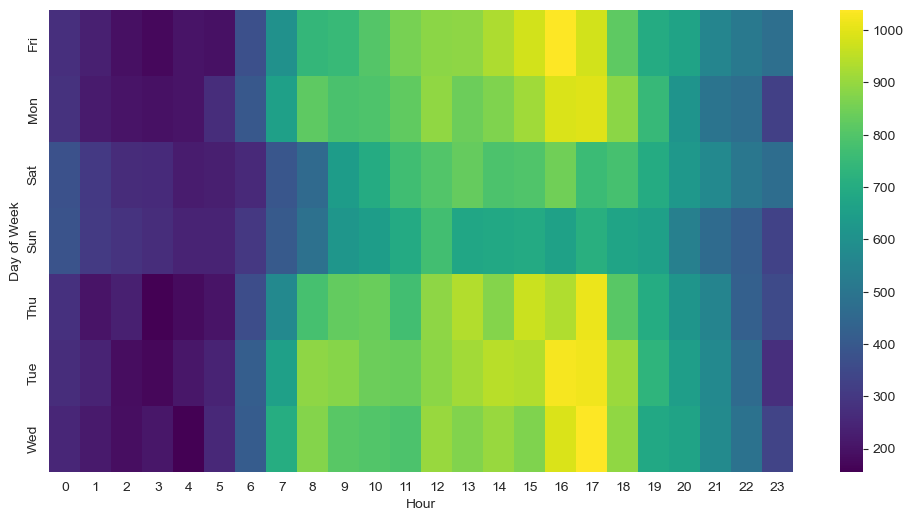

In [7]:
# WE ARE USING JUPTERNOTEBOOK FOR ANALYSIS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



df = pd.read_csv('911.csv') #upload csv files



df.info()                   #info about the dataframe
df.head(3)                  #first 3 datas are printed
df['zip'].value_counts().head(5)    #to see top 5 zipcodes
df['twp'].value_counts().head(5)    #to see top township in that data 
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])



#df['column_name'].fillna(value=df['column_name'].mean()) #if there any missing datas in the dataset
sns.countplot(x='Reason',data=df,palette='viridis')


df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot() #traffic
plt.title('Traffic')
plt.tight_layout()

df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot() #fire
plt.title('Traffic')
plt.tight_layout()

df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot() #EMS
plt.title('Traffic')
plt.tight_layout()


dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()


p